# Chapter 12 : Parallelizing Neural Network Training with Pytorch

## PyTorch and training performance

### Performance challenges 

Python is limited by the Global Interpreter Lock (GIL) to one core.  Since MLP network with many hidden layers can quickly grow in parameters, this limitation can be bypassed by using the GPU, which are better value for computations.

### What is PyTorch?

*PyTorch* is a programming interface for running machine learning algorithms.  It allows a script to use CPU and GPU and TLU devices. 

PyTorch is built around a computation graph composed of a set of nodes.  Each node represents an operation with zero or more inputs or outputs. 

PyTorch uses tensors which are analogous to NumPy arrays, but optimized for GPU computations.  They act as scalars (rank 1), vectors (rank 2), matrices (rank 3), etc. 

### How to learn PyTorch

- understand tensors and how to use an manipulate them
- understand how to load data and use `torch.utils.data`
- use `torch.nn` neural network module, and then build machine learning modules

## First Steps with PyTorch
- install via `pip`

### Making Tensors

Tensors can be made from lists and NumPy arrays.
- Pass lists to `.tensor`
- Pass arrays to `from_numpy`

In [1]:
import torch
import numpy as np
np.set_printoptions(precision=3)
a = [1, 2, 3]
b = np.array([4, 5, 6], dtype=np.int32) 
t_a = torch.tensor(a)
t_b = torch.from_numpy(b)
print(t_a)
print(t_b)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


Just like an array, tensors have `.shape`:

In [2]:
t_ones = torch.ones(2, 3) 
print(t_ones)
t_ones.shape

tensor([[1., 1., 1.],
        [1., 1., 1.]])


torch.Size([2, 3])

A tensor of random values can be created:

In [19]:
rand_tensor = torch.rand(2,3)
print(rand_tensor)

tensor([[0.5098, 0.5946, 0.4730],
        [0.5654, 0.4023, 0.3465]])


### Manipulating the data type and shape of a tensor

`.to()` is used to cast to a different datatype:

In [20]:
t_a_new = t_a.to(torch.int64)
print(t_a_new.dtype)

torch.int64


Some operations need tensors of a certain rank; therefore, the size and/or shape of a tensor might need to be manipulated.

Transposing: use `.transpose`

In [21]:
t = torch.rand(3, 5)
t_tr = torch.transpose(t, 0, 1)
print(t.shape, ' --> ', t_tr.shape)

torch.Size([3, 5])  -->  torch.Size([5, 3])


Reshaping: use `.reshape`

In [23]:
t = torch.zeros(30)
t_reshape = t.reshape(5, 6) 
print(t.shape, ' ---> ', t_reshape.shape)

torch.Size([30])  --->  torch.Size([5, 6])


Removing a dimension: use `.squeeze`

In [24]:
t = torch.zeros(1, 2, 1, 4, 1)
t_sqz = torch.squeeze(t, 2)
print(t.shape, ' --> ', t_sqz.shape)

torch.Size([1, 2, 1, 4, 1])  -->  torch.Size([1, 2, 4, 1])


### Applying mathematical operations to tensors

Recall, nearly all the algorithms are applications of linear algebra. 

Make two random tensors--one uniform and the other normally distributed.  These are both $5 \times 2$ size matrices.

In [27]:
torch.manual_seed(1)
t1 = 2 * torch.rand(5, 2) - 1
t2 = torch.normal(mean=0, std=1, size=(5, 2))
print(t1)
print(t2)

tensor([[ 0.5153, -0.4414],
        [-0.1939,  0.4694],
        [-0.9414,  0.5997],
        [-0.2057,  0.5087],
        [ 0.1390, -0.1224]])
tensor([[ 0.8590,  0.7056],
        [-0.3406, -1.2720],
        [-1.1948,  0.0250],
        [-0.7627,  1.3969],
        [-0.3245,  0.2879]])


Multiplication:

In [28]:
t3 = torch.multiply(t1, t2)
print(t3)

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])


Mean, sum and standard deviation:

In [31]:
t4 = torch.mean(t1, axis=0)
t4_b = torch.sum(t1, axis=0)
t4_c = torch.std(t1, axis=0)
print(f"Mean = {t4}")
print(f"Sum = {t4_b}")
print(f"Std = {t4_c}")

Mean = tensor([-0.1373,  0.2028])
Sum = tensor([-0.6867,  1.0140])
Std = tensor([0.5378, 0.4591])


Matric product, i.e. $t_1 \times t_2^T$:

In [32]:
t5 = torch.matmul(t1, torch.transpose(t2, 0, 1))
print(t5)

tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])


Since matrix multiplication is not commutative, $t_1^T \times t_2$:

In [33]:
t6 = torch.matmul(torch.transpose(t1, 0, 1), t2)
print(t6)

tensor([[ 1.7453,  0.3392],
        [-1.6038, -0.2180]])


Compute the $L^2$ norm of a tensor:

In [34]:
norm_t1 = torch.linalg.norm(t1, ord=2, dim=1)
print(norm_t1)

tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])


### Split, stack and concatenate tensors

`torch.chunk` will split a tensor into equally sized tensors:

In [36]:
torch.manual_seed(1)
t = torch.rand(6)
print(t)
t_splits = torch.chunk(t, 3) #splits the 6 column tensor into 3 tensors with 2 columns
[item.numpy() for item in t_splits]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999])


[array([0.758, 0.279], dtype=float32),
 array([0.403, 0.735], dtype=float32),
 array([0.029, 0.8  ], dtype=float32)]

The splits do not need to be the same size; a list can be passed:

In [37]:
torch.manual_seed(1)
t = torch.rand(5)
print(t)
t_splits = torch.split(t, split_size_or_sections=[3, 2]) #split into two tensors with 3 and 2 columns
[item.numpy() for item in t_splits]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293])


[array([0.758, 0.279, 0.403], dtype=float32),
 array([0.735, 0.029], dtype=float32)]

Tensors are concatenated using `torch.cat`

In [38]:
A = torch.ones(3)
B = torch.zeros(2)
C = torch.cat([A, B], axis=0) 
print(C)

tensor([1., 1., 1., 0., 0.])


They can also be stacked using `torch.stack`:

In [39]:
A = torch.ones(3)
B = torch.zeros(3)
S = torch.stack([A, B], axis=1) 
print(S)

tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])


## Building input pipelines in PyTorch

NN models are commonly trained incrementally. This is because training sets are often too large for memory. This is called *batch* training (**not** mini-batch).  This type of training often requires a preprocessing pipeline. In PyTorch, this is done via `Dataset` and `DataLoader` modules.

### Creating a PyTorch DataLoader from existing tensors

For existing data in a list or NumPy array, use `DataLoader`:

In [41]:
from torch.utils.data import DataLoader 
t = torch.arange(6, dtype=torch.float32)  #make a 
data_loader = DataLoader(t)
for item in data_loader: 
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


Batch sizes can also be defined via `batch_size`:

In [42]:
Data_loader = DataLoader(t, batch_size=3, drop_last=False) 
for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', batch)

batch 1: tensor([0.])
batch 2: tensor([1.])
batch 3: tensor([2.])
batch 4: tensor([3.])
batch 5: tensor([4.])
batch 6: tensor([5.])


### Combining two tensors in a joint dataset

Example, `t_y` holds class labels and `t_x` hold column values.

In [43]:
torch.manual_seed(1)
t_x = torch.rand([4, 3], dtype=torch.float32) 
t_y = torch.arange(4)

A joint dataset class can be made. `__getitem__` will return a same at a given index.

In [45]:
from torch.utils.data import Dataset
class JointDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y 
    def __len__(self):
        return len(self.x)
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]
    
joint_dataset = JointDataset(t_x, t_y)

In [46]:
for example in joint_dataset:
    print(' x: ', example[0], ' y: ', example[1])

 x:  tensor([0.7576, 0.2793, 0.4031])  y:  tensor(0)
 x:  tensor([0.7347, 0.0293, 0.7999])  y:  tensor(1)
 x:  tensor([0.3971, 0.7544, 0.5695])  y:  tensor(2)
 x:  tensor([0.4388, 0.6387, 0.5247])  y:  tensor(3)


### Shuffle, batch and repeat

Recall that training NN in batches requires randomized samples of data.

Begin by making a random batch, and shuffling it with the `shuffle` parameter:

In [48]:
torch.manual_seed(1)
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)

Now can move through the batches.

In [49]:
for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', 'x:', batch[0],
              '\n         y:', batch[1])

batch 1: x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) 
         y: tensor([2, 0])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
         y: tensor([1, 3])


Now can move through for each epic, as if a model was being trained:

In [51]:
for epoch in range(2):
    print(f'epoch {epoch+1}')
    for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0], '\n         y:', batch[1])

epoch 1
batch 1: x: tensor([[0.4388, 0.6387, 0.5247],
        [0.3971, 0.7544, 0.5695]]) 
         y: tensor([3, 2])
batch 2: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999]]) 
         y: tensor([0, 1])
epoch 2
batch 1: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.4388, 0.6387, 0.5247]]) 
         y: tensor([0, 3])
batch 2: x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7347, 0.0293, 0.7999]]) 
         y: tensor([2, 1])


### Creating a dataset from files on your local disk storage

Use the `pathlib` to make a list of all the image files.

In [56]:
import pathlib
imgdir_path = pathlib.Path('cat_dog_images')
file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])
print(file_list)

['cat_dog_images/cat-01.jpg', 'cat_dog_images/cat-02.jpg', 'cat_dog_images/cat-03.jpg', 'cat_dog_images/dog-01.jpg', 'cat_dog_images/dog-02.jpg', 'cat_dog_images/dog-03.jpg']


Visualize the images:

Image shape: (900, 1200, 3)
Image shape: (900, 1200, 3)
Image shape: (900, 742, 3)
Image shape: (800, 1200, 3)
Image shape: (800, 1200, 3)
Image shape: (900, 1200, 3)


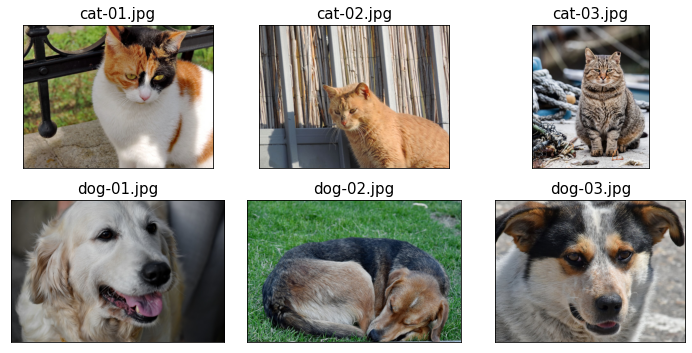

In [57]:
import matplotlib.pyplot as plt
import os
from PIL import Image
fig = plt.figure(figsize=(10, 5)) 
for i, file in enumerate(file_list):
    img = Image.open(file)
    print('Image shape:', np.array(img).shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15) 
plt.tight_layout()
plt.show()

Note two things:
1. the images will need to be standardized to a single size
2. the labels will need to be extracted from the file names

Labels are easily extracted:

In [59]:
labels = [1 if 'dog' in os.path.basename(file) else 0 for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


Make a dataset class:

In [60]:
class ImageDataset(Dataset):
    def __init__(self, file_list, labels):
        self.file_list = file_list
        self.labels = labels
    def __getitem__(self, index):
        file = self.file_list[index]
        label = self.labels[index]
        return file, label
    def __len__(self):
        return len(self.labels)
    
image_dataset = ImageDataset(file_list, labels) 
for file, label in image_dataset:
    print(file, label)

cat_dog_images/cat-01.jpg 0
cat_dog_images/cat-02.jpg 0
cat_dog_images/cat-03.jpg 0
cat_dog_images/dog-01.jpg 1
cat_dog_images/dog-02.jpg 1
cat_dog_images/dog-03.jpg 1


In [61]:
import torchvision.transforms as transforms 
img_height, img_width = 80, 120
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((img_height, img_width)),
])

ModuleNotFoundError: No module named 'torchvision'